In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import KernelCenterer
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import SparseCoder
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import AffinityPropagation
from markdown import markdown
import numpy as np
import hvplot.pandas
import pandas as pd


### Report at bottom Please scroll down. This is just the pre work


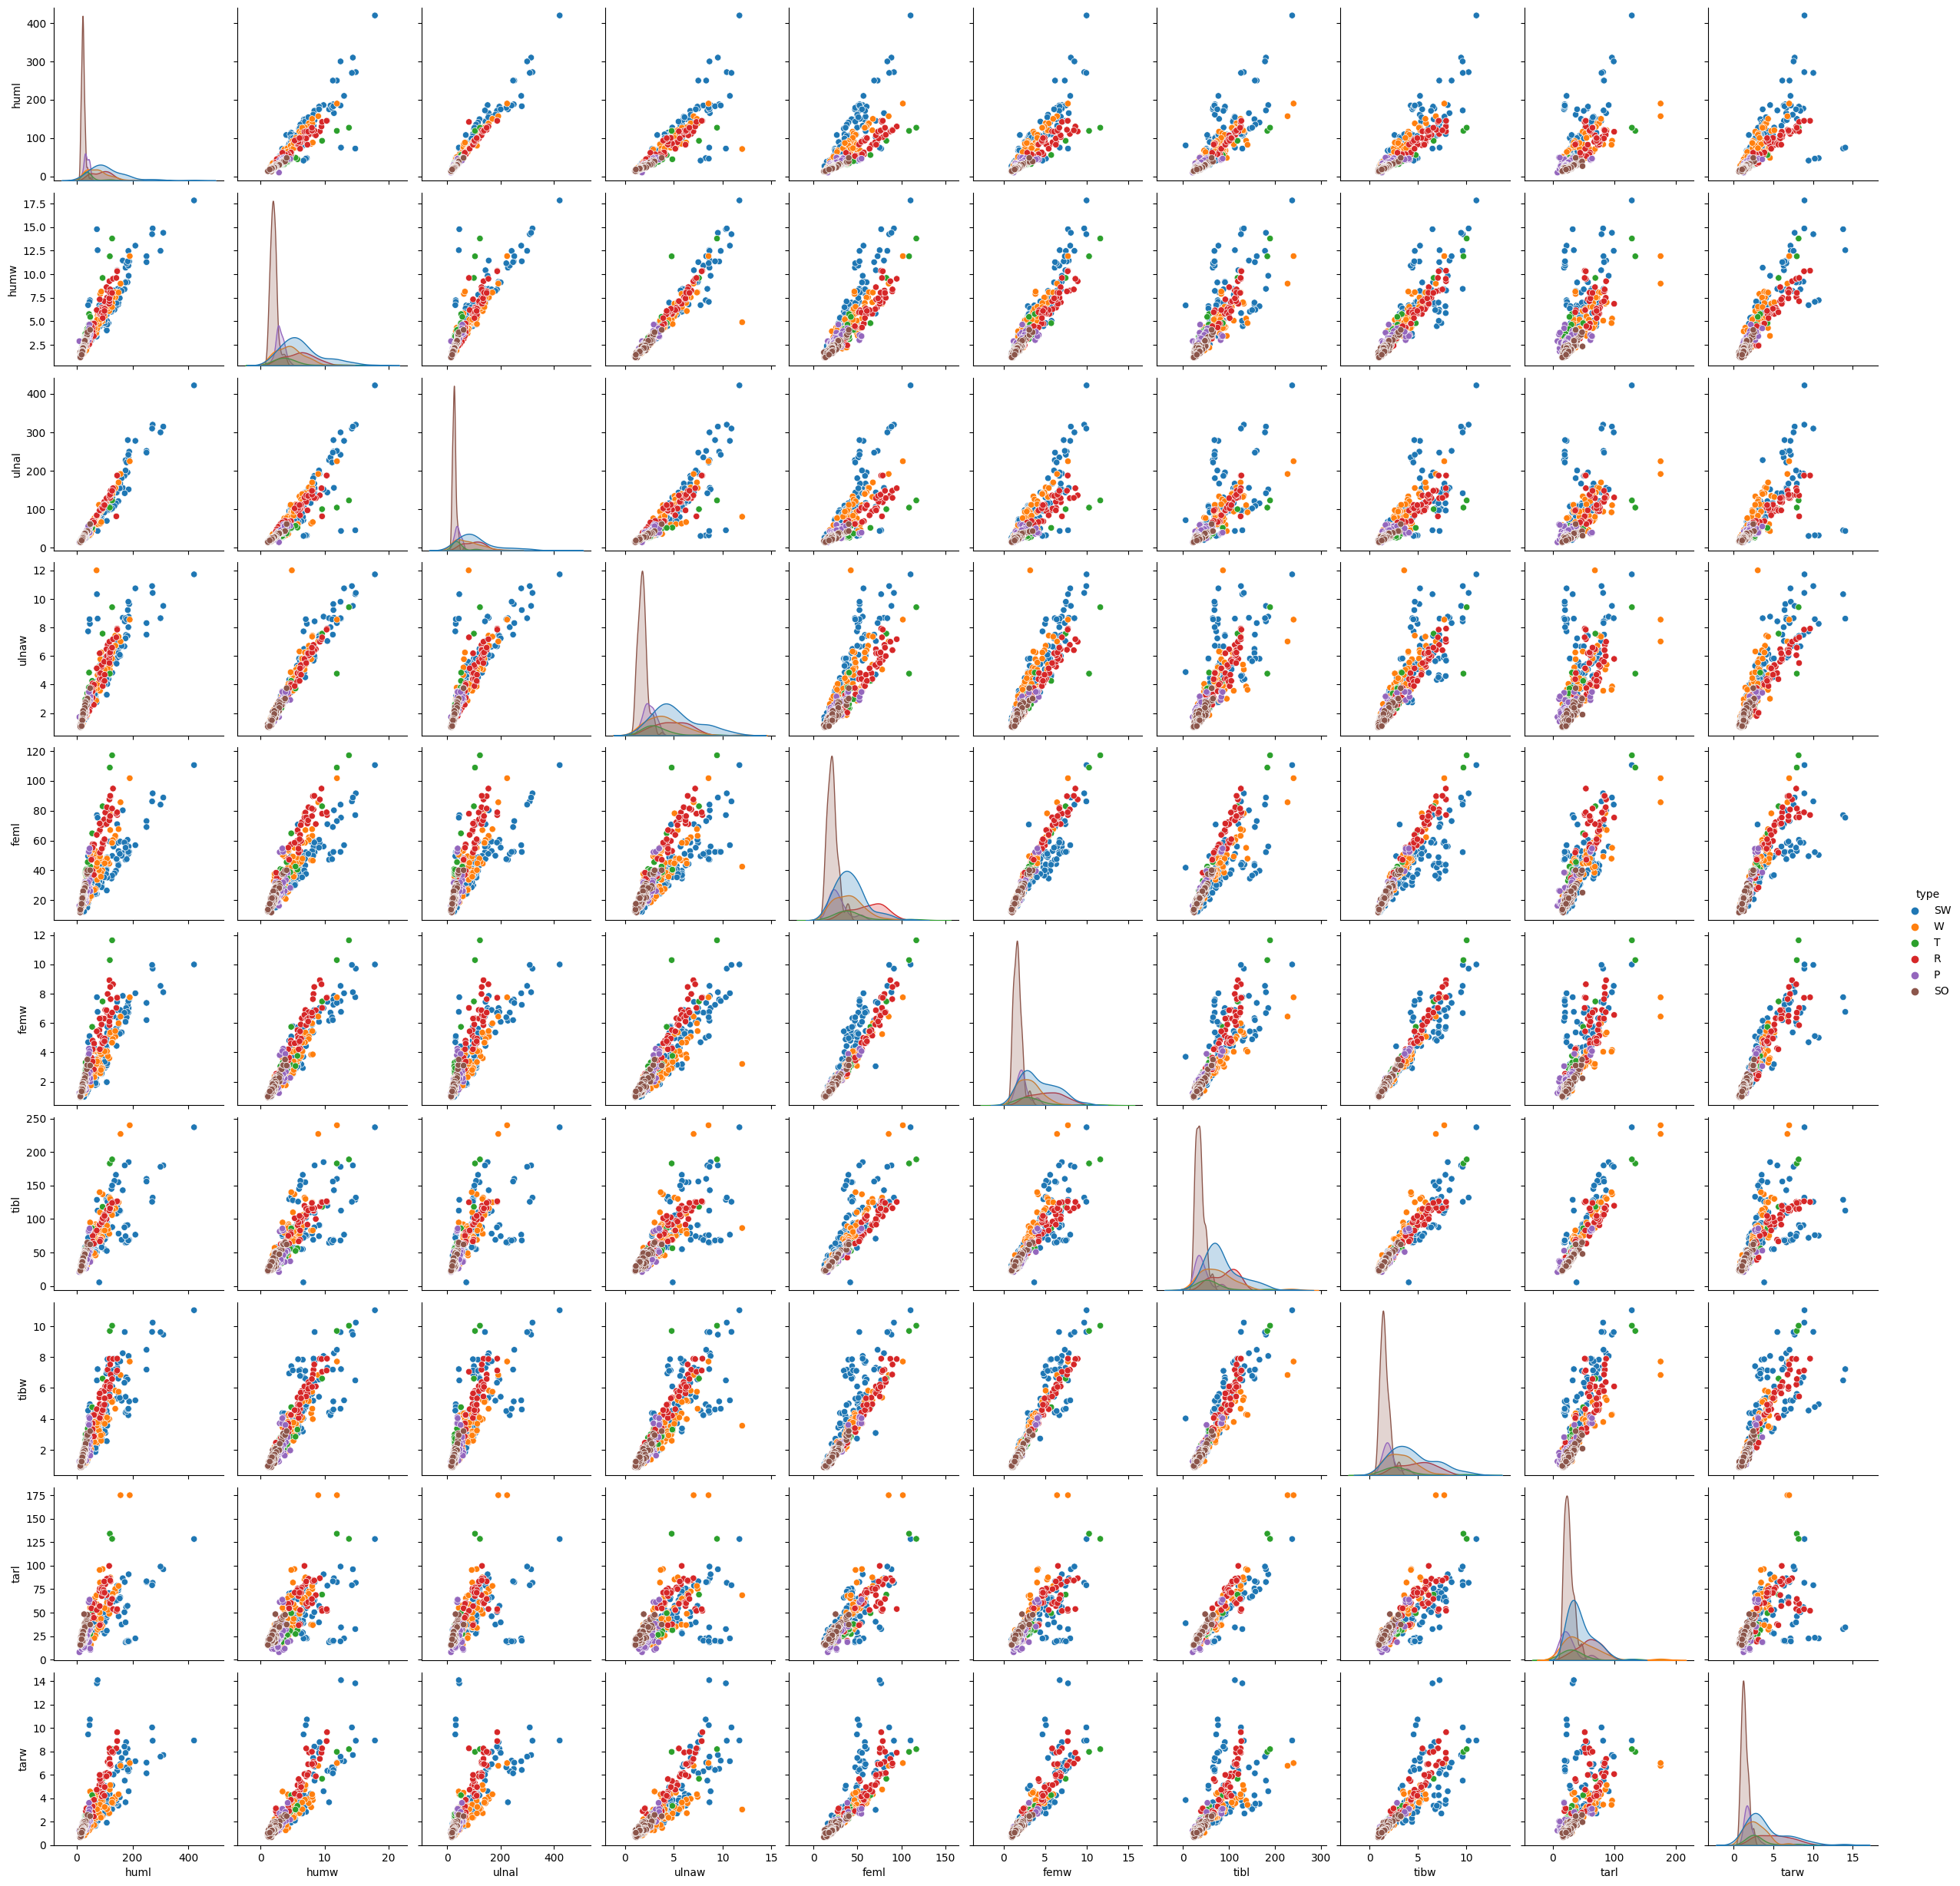

In [3]:
cols = ['id', 'huml', 'humw','ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw', 'type']
birds1= pd.read_csv('bird.csv', names=cols,header = 0)
birds1=birds1.dropna()
birds = birds1.iloc[:,1:12]
birds_y = birds['type']
birds_x = birds.iloc[:,0:10]
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(birds_y)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)
fig1 = sns.pairplot(birds, hue='type')
#fig1.figure.savefig("Pair_plot_all")

Text(0.5, 1.0, 'Covariance Matrix Before choosing')

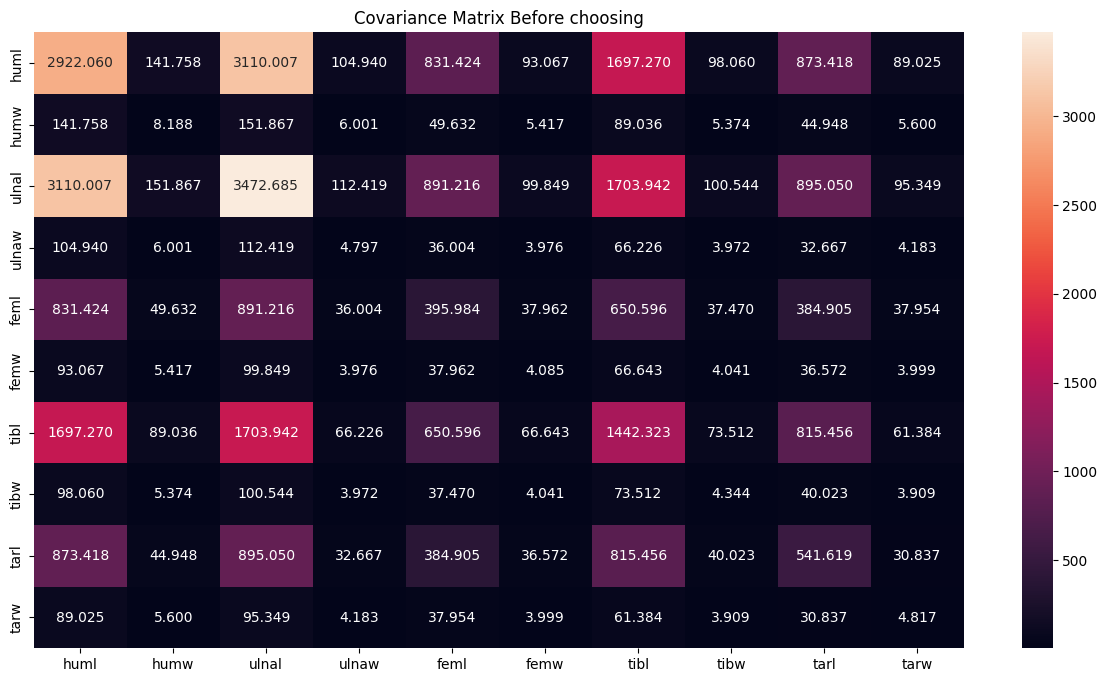

In [4]:
plt.figure(figsize=(15,8))
fig7=sns.heatmap(np.cov(birds_x.T), annot=True,
            cmap="rocket",cbar = True,fmt="0.3f",
            xticklabels=birds_x.columns,
        yticklabels=birds_x.columns)
plt.title("Covariance Matrix Before choosing")
#fig7.figure.savefig("Covariance Matrix before choosing")

Text(0.5, 1.0, 'Corr matrix for all values')

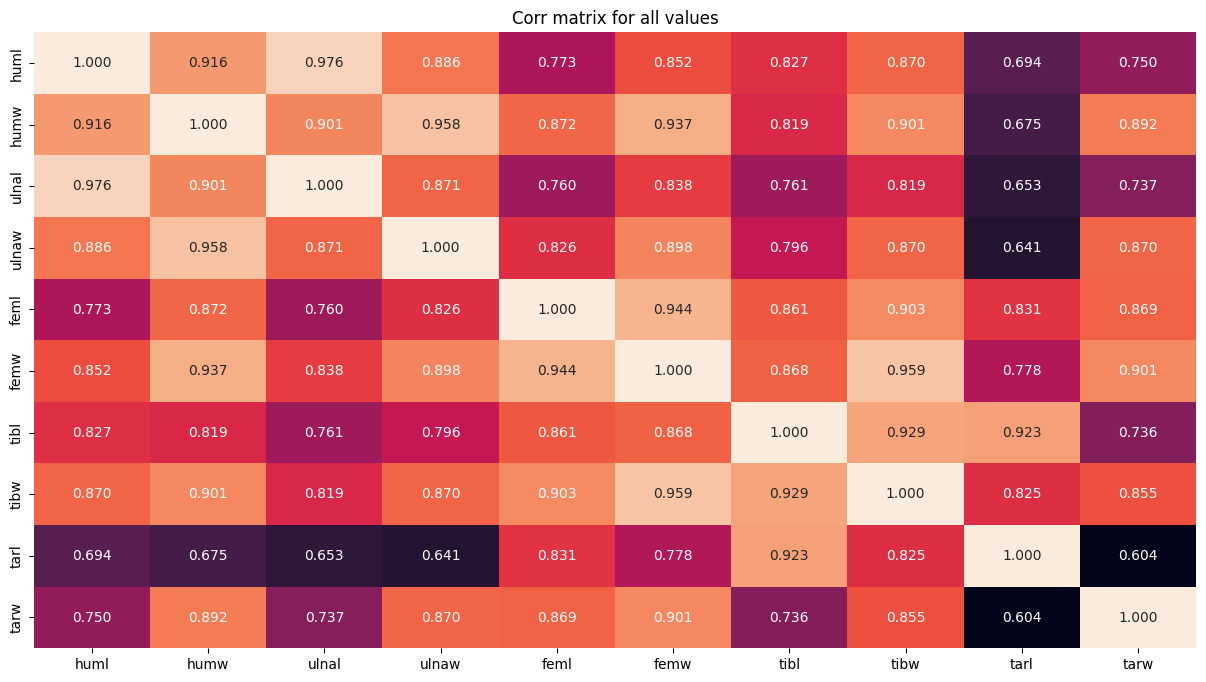

In [5]:
plt.figure(figsize=(15,8))
fig4=sns.heatmap(birds_x.corr(), 
annot = True, fmt = "0.3f", cbar= False, cmap ='rocket',
xticklabels=birds_x.columns,yticklabels=birds_x.columns)
plt.title("Corr matrix for all values")
#fig4.figure.savefig("Correlation Matrix before choosing")

C:\Users\amcfa\AppData\Local\Temp\ipykernel_14896\3986999162.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


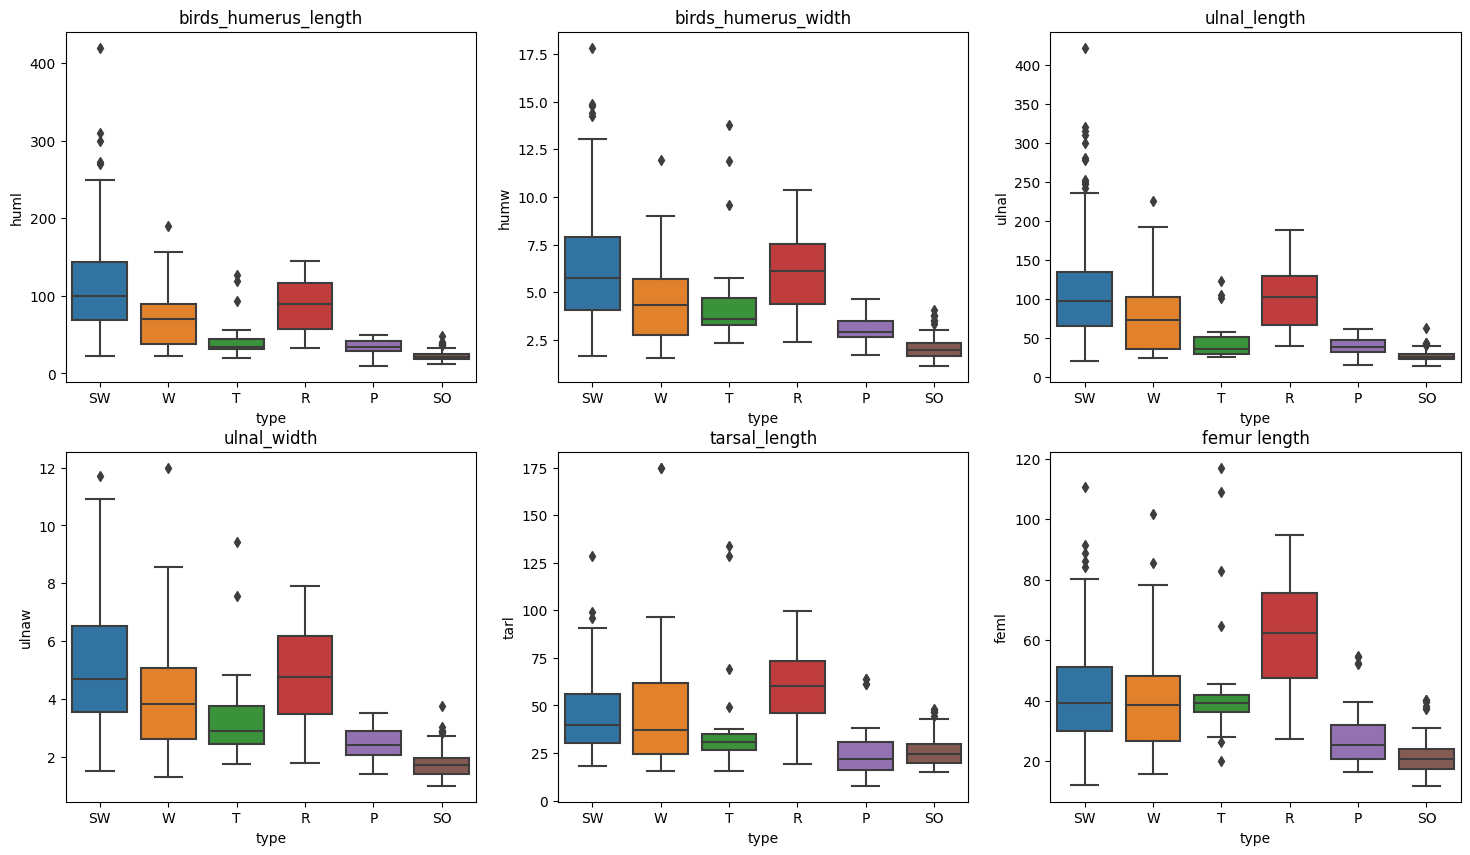

In [6]:
fig3, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], data=birds, x='type', y='huml').set(title = 'birds_humerus_length')
sns.boxplot(ax=axes[0, 1], data=birds, x='type', y='humw').set(title = 'birds_humerus_width')
sns.boxplot(ax=axes[0, 2], data=birds, x='type', y='ulnal').set(title = 'ulnal_length')
sns.boxplot(ax=axes[1, 0], data=birds, x='type', y='ulnaw').set(title = 'ulnal_width')
sns.boxplot(ax=axes[1, 1], data=birds, x='type', y='tarl').set(title = 'tarsal_length')
sns.boxplot(ax=axes[1, 2], data=birds, x='type', y='feml').set(title = 'femur length')

fig3.show()
#fig3.figure.savefig("Box_plot_To_check_for_outliers")

In [7]:
birds = birds[birds['huml'] < 250]
birds = birds[birds['ulnal'] < 220]

label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(birds_y)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

In [8]:
birds2_x = birds_x[['huml','humw', 'ulnal','ulnaw', 'tarl']]

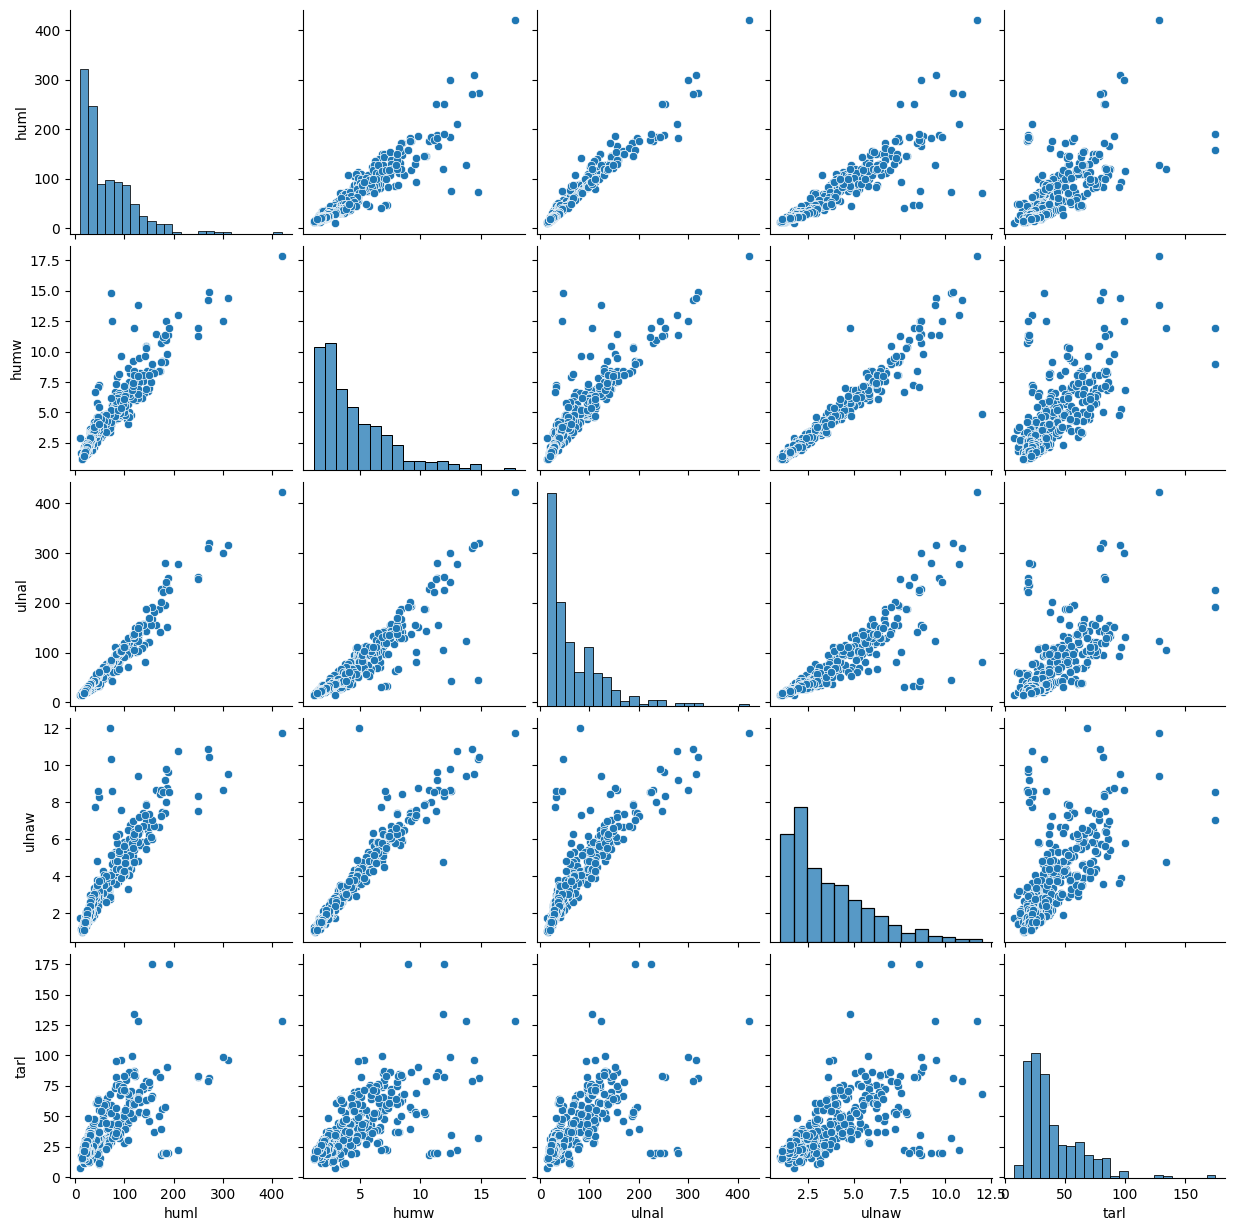

In [9]:
fig5=sns.pairplot(birds2_x)
#fig5.figure.savefig('Pair_plot_reduced')

Text(0.5, 1.0, 'Correlation matrix for specific values')

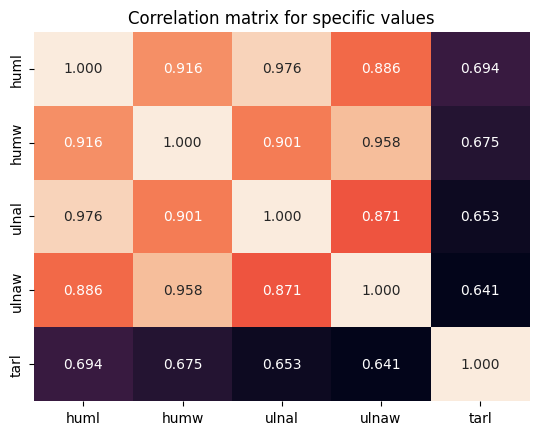

In [10]:
fig8 = sns.heatmap(birds2_x.corr(), 
annot = True, fmt = "0.3f", cbar= False, cmap ='rocket',
xticklabels=birds2_x.columns,yticklabels=birds2_x.columns)
plt.title("Correlation matrix for specific values")

In [11]:
preprocessor = Pipeline([("scaler", MinMaxScaler())])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds2_x)
preprocessed_data = pipe["preprocessor"].transform(birds2_x)

Text(0.5, 1.0, 'Covariance matrix for fewer features after transformation')

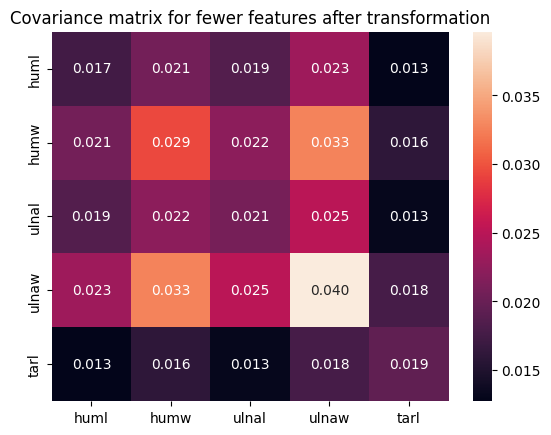

In [12]:
fig8 = sns.heatmap(np.cov(preprocessed_data.T), annot=True,
            cmap="rocket",cbar = True,fmt="0.3f",
            xticklabels=birds2_x.columns,
        yticklabels=birds2_x.columns)
plt.title("Covariance matrix for fewer features after transformation")
#fig8.figure.savefig('Covariance_matrix_after_scaling')

In [13]:
def data_pipeline(scalerhere):
	preprocessor = Pipeline([("scaler", scalerhere)])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print(scalerhere,"score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [14]:
data_pipeline(StandardScaler())
data_pipeline(MinMaxScaler())
data_pipeline(MaxAbsScaler())
data_pipeline(RobustScaler())
data_pipeline(Normalizer())

StandardScaler() score 0.49604644367072726 Adjusted_rand 0.23425018773402168
MinMaxScaler() score 0.4263961242208151 Adjusted_rand 0.2651820164804993
MaxAbsScaler() score 0.42486443308476807 Adjusted_rand 0.2651820164804993
RobustScaler() score 0.5002450780490989 Adjusted_rand 0.23478901934988486
Normalizer() score 0.4098049552521544 Adjusted_rand 0.244163962505303


0.4098049552521544

In [17]:
def data_pipeline(scalerhere,second):
	preprocessor = Pipeline([("scaler", scalerhere()),("pca",second())])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print(scalerhere,"score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [18]:
data_pipeline(StandardScaler,KernelPCA)
data_pipeline(MinMaxScaler,KernelPCA)
data_pipeline(MaxAbsScaler,KernelPCA)
data_pipeline(RobustScaler,KernelPCA)
data_pipeline(Normalizer,KernelPCA)

<class 'sklearn.preprocessing._data.StandardScaler'> score 0.4916319271718085 Adjusted_rand 0.23452924404561898
<class 'sklearn.preprocessing._data.MinMaxScaler'> score 0.42639612422081513 Adjusted_rand 0.2651820164804993
<class 'sklearn.preprocessing._data.MaxAbsScaler'> score 0.4248644330847682 Adjusted_rand 0.2651820164804993
<class 'sklearn.preprocessing._data.RobustScaler'> score 0.5002450780490989 Adjusted_rand 0.23478901934988486
<class 'sklearn.preprocessing._data.Normalizer'> score 0.40992347071416124 Adjusted_rand 0.24333280425948273


0.40992347071416124

In [19]:
data_pipeline(StandardScaler,PCA)
data_pipeline(MinMaxScaler,PCA)
data_pipeline(MaxAbsScaler,PCA)
data_pipeline(RobustScaler,PCA)
data_pipeline(Normalizer,PCA)

<class 'sklearn.preprocessing._data.StandardScaler'> score 0.4953908376438722 Adjusted_rand 0.23809213613700886
<class 'sklearn.preprocessing._data.MinMaxScaler'> score 0.4255814310454731 Adjusted_rand 0.26458743276594576
<class 'sklearn.preprocessing._data.MaxAbsScaler'> score 0.4248644330847682 Adjusted_rand 0.2651820164804993
<class 'sklearn.preprocessing._data.RobustScaler'> score 0.501246746052751 Adjusted_rand 0.2349954666037393
<class 'sklearn.preprocessing._data.Normalizer'> score 0.4099234707141613 Adjusted_rand 0.24333280425948273


0.4099234707141613

In [20]:
def data_pipeline(scalerhere, kernel):
	preprocessor = Pipeline([("scaler", scalerhere()),("pca", KernelPCA(n_components=None, kernel=kernel, gamma=1, fit_inverse_transform=True, alpha=1))])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print("score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [21]:
data_pipeline(StandardScaler,'rbf')
data_pipeline(MinMaxScaler,'rbf')
data_pipeline(MaxAbsScaler,'rbf')
data_pipeline(RobustScaler,'rbf')
data_pipeline(Normalizer,'rbf')
data_pipeline(StandardScaler,'linear')
data_pipeline(MinMaxScaler,'linear')
data_pipeline(MaxAbsScaler,'linear')
data_pipeline(RobustScaler,'linear')
data_pipeline(Normalizer,'linear')
data_pipeline(StandardScaler,'cosine')
data_pipeline(MinMaxScaler,'cosine')
data_pipeline(MaxAbsScaler,'cosine')
data_pipeline(RobustScaler,'cosine')
data_pipeline(Normalizer,'cosine')

score 0.22820088860228682 Adjusted_rand 0.22667705917131345
score 0.41885056150421673 Adjusted_rand 0.26590051555856964
score 0.4203073567284844 Adjusted_rand 0.2646063608370288
score 0.2738438626756185 Adjusted_rand 0.25224387276353716
score 0.40794774519680904 Adjusted_rand 0.24632226247734695
score 0.4979711157567721 Adjusted_rand 0.23971852424582335
score 0.4255814310454731 Adjusted_rand 0.26458743276594576
score 0.4248644330847682 Adjusted_rand 0.2651820164804993
score 0.4974054190448908 Adjusted_rand 0.23138779414735336
score 0.4098049552521525 Adjusted_rand 0.244163962505303
score 0.5332413399906298 Adjusted_rand 0.2358325237833736
score 0.3374755205645802 Adjusted_rand 0.19327448277186562
score 0.33911528863428475 Adjusted_rand 0.2339605870527251
score 0.38208079746964374 Adjusted_rand 0.2669065655515774
score 0.4099234707141612 Adjusted_rand 0.24333280425948273


0.4099234707141612

In [29]:
def data_pipeline(scalerhere, kernel,gamma):
	preprocessor = Pipeline([("scaler", scalerhere()),("pca", KernelPCA(n_components=None, kernel=kernel, gamma=gamma, fit_inverse_transform=True, alpha=5))])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print("score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [30]:
data_pipeline(StandardScaler,'rbf',0.001)
data_pipeline(MinMaxScaler,'rbf',0.001)
data_pipeline(MaxAbsScaler,'rbf',0.001)
data_pipeline(RobustScaler,'rbf',0.001)
data_pipeline(Normalizer,'rbf',0.001)
data_pipeline(StandardScaler,'linear',0.001)
data_pipeline(MinMaxScaler,'linear',0.001)
data_pipeline(MaxAbsScaler,'linear',0.001)
data_pipeline(RobustScaler,'linear',0.001)
data_pipeline(Normalizer,'linear',0.001)
data_pipeline(StandardScaler,'cosine',0.001)
data_pipeline(MinMaxScaler,'cosine',0.001)
data_pipeline(MaxAbsScaler,'cosine',0.001)
data_pipeline(RobustScaler,'cosine',0.001)
data_pipeline(Normalizer,'cosine',0.001)

score 0.49760047688167935 Adjusted_rand 0.23971852424582335
score 0.4255758649613557 Adjusted_rand 0.26458743276594576
score 0.42485948832953835 Adjusted_rand 0.2651820164804993
score 0.5000045933498939 Adjusted_rand 0.23478901934988486
score 0.40992193045799735 Adjusted_rand 0.24333280425948273
score 0.49604644367072726 Adjusted_rand 0.23425018773402168
score 0.42639612422081513 Adjusted_rand 0.2651820164804993
score 0.4248644330847682 Adjusted_rand 0.2651820164804993
score 0.5002450780490989 Adjusted_rand 0.23478901934988486
score 0.40992347071416124 Adjusted_rand 0.24333280425948273
score 0.5332280390727173 Adjusted_rand 0.23304466243819708
score 0.3374755205645802 Adjusted_rand 0.19327448277186562
score 0.33836440173966414 Adjusted_rand 0.23238358553406738
score 0.38208079746964374 Adjusted_rand 0.2669065655515774
score 0.4099234707141612 Adjusted_rand 0.24333280425948273


0.4099234707141612

In [26]:
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", KernelPCA(n_components=None, kernel='cosine', gamma=1, fit_inverse_transform=True, alpha=5))])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=10,algorithm='elkan'))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds2_x)
preprocessed_data = pipe["preprocessor"].transform(birds2_x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
score = silhouette_score(preprocessed_data,predicted_labels)
rand = adjusted_rand_score(true_labels,predicted_labels)

print("score",score,"Adjusted_rand",rand)

score 0.32642515996958316 Adjusted_rand 0.18599637005070546


<AxesSubplot: xlabel='0', ylabel='1'>

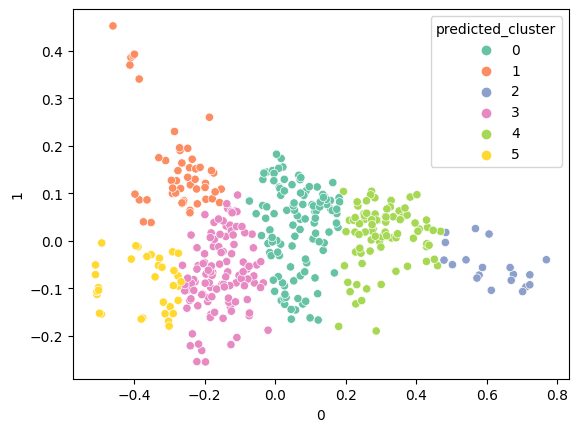

In [31]:
ab= pd.DataFrame(pipe["preprocessor"].transform(birds2_x))
ab["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
ab["true_label"] = true_labels
sns.scatterplot(x=0, y=1, data=ab, hue="predicted_cluster",palette="Set2")


In [32]:
preprocessor = Pipeline([("scaler", MinMaxScaler())])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50,algorithm='elkan'))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds2_x)
preprocessed_data = pipe["preprocessor"].transform(birds2_x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
score = silhouette_score(preprocessed_data,predicted_labels)
rand = adjusted_rand_score(true_labels,predicted_labels)

print("score",score,"Adjusted_rand",rand)

score 0.4263961242208151 Adjusted_rand 0.2651820164804993


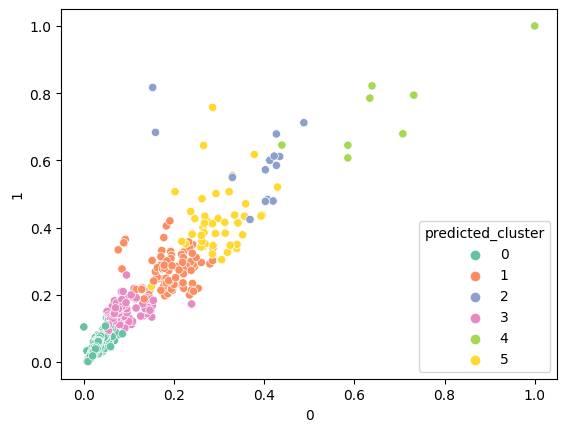

In [33]:
ab= pd.DataFrame(pipe["preprocessor"].transform(birds2_x))
ab["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
ab["true_label"] = true_labels
fig10=sns.scatterplot(x=0, y=1, data=ab, hue="predicted_cluster",palette="Set2")
#fig10.figure.savefig("Final_clustering.png") 

In [28]:
repetitions =[0.3079584775086505,0.06920415224913495,0.2837370242214533,0.09688581314878893,0.1972318339100346,0.21107266435986158,0.058823529411764705,
              0.1972318339100346,0.19377162629757785,0.22145328719723184,0.12802768166089964,0.17993079584775087,0.08996539792387544]
X_axis = [0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.3,0.325,0.35,0.4,0.45,0.5]

data95= pd.DataFrame(zip( repetitions,X_axis), 
                     columns =['elkan','Run'])
#data95.to_csv("full_items_result_values_final")
data95.hvplot(x='Run', y=["elkan"], kind='scatter')

:Scatter   [Run]   (elkan)

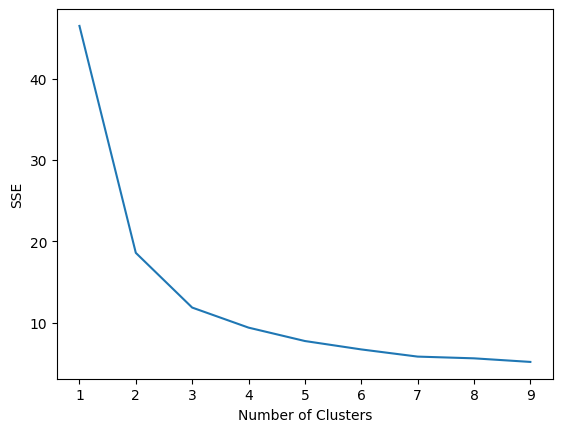

3

In [16]:
preprocessor = Pipeline([("scaler", MaxAbsScaler())])
pipe = Pipeline([('preprocessor', preprocessor)])
pipe.fit(birds2_x)
preprocessed_dataA = pipe["preprocessor"].transform(birds2_x)
kmeans_kwargs = {
"init": "random",
"n_init": 10,
 "max_iter": 300,
 "random_state": 42,}


sse = []
for k in range(1, 10):
	kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
	kmeans.fit(preprocessed_dataA)
	sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
knees = KneeLocator(
range(1, 10), sse, curve="convex", direction="decreasing")

knees.elbow

### Analysis of Birds bones and living habits data set
## An attempt at species categorization using sklearn Kmeans Unsupervised learning.
https://www.kaggle.com/datasets/zhangjuefei/birds-bones-and-living-habits


https://scikit-learn.org/stable/modules/clustering.html#k-means


https://github.com/oohtmeel1/Unsup2 < Project Repo>



![Pidgeon Skeleton](https://s-media-cache-ak0.pinimg.com/564x/cb/cb/41/cbcb41cb2c1db6c32c1e869be2172c3b.jpg) Image courtesy of kaggle





Species identification is an important part of conservation efforts. This project attempts to use the Birds bones and living habits data set to label species based on skeletal features.The idea is that birds skeletal structure should be varied enough to allow for easy and simple identification. 
The data labels are:


<b>*SW* :Swimming \
*W*  :Wading \
*T*  :Terrestrial \
*R*  :Raptors \
*P*  :Scansorial_birds \
*SO* :Singing Birds </b>

These will be how the data is clustered. No two bird species are exactly alike, so given enough data points are provided this should work. 

Since the data set seemed very distinct (An emu is much larger than say a chicken) K means felt like a very good choice. The basic idea here is: K centroids will be chosen, the model will be fit and when the centroids stop moving is when we are done. Even though K means is supposed to be non-deterministic, more often than not a pidgeon and emu should not be clustered together. 


After the data was read in, the next step was to take a look. Right away it can be noted that the ID column should
be dropped, it serves no purpose. 


|    |   id |   huml |   humw |   ulnal |   ulnaw |   feml |   femw |   tibl |   tibw |   tarl |   tarw | type   |
|---:|-----:|-------:|-------:|--------:|--------:|-------:|-------:|-------:|-------:|-------:|-------:|:-------|
|  0 |    0 |  80.78 |   6.68 |   72.01 |    4.88 |  41.81 |   3.7  |   5.5  |   4.03 |  38.7  |   3.84 | SW     |
|  1 |    1 |  88.91 |   6.63 |   80.53 |    5.59 |  47.04 |   4.3  |  80.22 |   4.51 |  41.5  |   4.01 | SW     |
|  2 |    2 |  79.97 |   6.37 |   69.26 |    5.28 |  43.07 |   3.9  |  75.35 |   4.04 |  38.31 |   3.34 | SW     |
|  3 |    3 |  77.65 |   5.7  |   65.76 |    4.77 |  40.04 |   3.52 |  69.17 |   3.4  |  35.78 |   3.41 | SW     |
|  4 |    4 |  62.8  |   4.84 |   52.09 |    3.73 |  33.95 |   2.72 |  56.27 |   2.96 |  31.88 |   3.13 | SW     |

The shape of the df is (420, 12). After na values are dropped this further reduces to (413,12).


The data is then split into two pieces, the labels (Type) in one df.


|    | type   |     
|---:|:-------|
|  0 | SW     |
|  1 | SW     |
|  2 | SW     |
|  3 | SW     |
|  4 | SW     |







and all of the other pieces of relevant data into another. We would not want the model to know the answers.


|    |   huml |   humw |   ulnal |   ulnaw |   feml |   femw |   tibl |   tibw |   tarl |   tarw |
|---:|-------:|-------:|--------:|--------:|-------:|-------:|-------:|-------:|-------:|-------:|
|  0 |  80.78 |   6.68 |   72.01 |    4.88 |  41.81 |   3.7  |   5.5  |   4.03 |  38.7  |   3.84 |
|  1 |  88.91 |   6.63 |   80.53 |    5.59 |  47.04 |   4.3  |  80.22 |   4.51 |  41.5  |   4.01 |



Then a pair plot was loaded. 

![alt text](Pair_plot_all.png "Pair plot of everything")

The above pair plot shows a lot of covariance and maybe coliniearity. Which makes some sense, if a bird has big hip bones it probably has big leg bones too. But this might not be so great for training a model, and we might want to exclude some of those features.  So far the variables 'huml','humw', 'ulnal','ulnaw', 'tarl' look the most promising being more randomly scattered than say 'femw'. But we should look at a few more pieces of evidence before we fully decide to drop or keep certain variables.

## Box plots to check for outliers

Box plots were plotted against certain features for simple and straightforward outlier detection. And it is very obvious that there are outliers. And they will be removed so they do not skew the data too much.

![alt text](Box_plot_To_check_for_outliers.png "Box plot to check for outliers")

Now that the data is a little bit more cleaned up. I will plot a correlation matrix, which pairs well with the pair plot above. It helps show what variables are highly correlated and how strong that relationship is. Correlation is how closely related certain variables are. There are only a few variables that do not have very strong relationships. Humerus length, Humerus Width, Ulnal length and width and tarsal length all have low correlation values. The Covariance matrix also has values that are very high and shows a definite need for some feature selection. 


![alt text](Correlation_Matrix_before_choosing.png "Pair plot of everything")




![alt text](Covariance_Matrix_before_choosing_(2).png)

To help illustrate the point further, at least a little bit. I ran an analysis on the full data set using the clustering algorithm and have the generated results. 
There are two variables in table below. One is silhouette score or the silhouette coefficient. Which ranges from -1 to 1, 1 being the best value and -1 being the worst.
It is the mean distance between clusters, and the mean distance to the nearest cluster that is not part of that samples cluster. Given by the formula:


\begin{pmatrix}
   b - a\\ \hline
   max(a,b)
\end{pmatrix}  


<h5 align="center">a = intra cluster distance </h5> 
<h5 align="center">b = mean nearest intracluster distance</h5>


|    |    silhouette_score |   rand_score |
|---:|---------:|-------------:|
|  0 | 0.374319 |     0.239816 |



And since I have the ground truth, which are my labels (the bird types) I can run a metric called the adjusted Rand Index. Which uses the actual cluster assignment to provide the score. It is a pairwise measure which computes the number of same or different clusters in the predicted and true clusterings. 
A value of 0.0 means the labels are random independent of the cluster amounts and 1.0 when the clusters are completely identical. So a 1 is good and 0 is not as good.

Rand_score_Calculation : <b>ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)</b> ** thanks scikit learn 

And the obtained result is not that great.Removing some features might help.

Only a few features were selected.And they had a pair plot generated. 

It is very clearly visible that the data looks much more scattered, which might be a good sign. Time to move onto the next part.



![alt text](Pair_plot_reduced.png "pair plot of just a few features")

### Pre Processor Selection

To scale or not to scale? One of life's big questions if you need to proccess data. 
A great way to tell is by looking at the covariance matrix.

 Which measures the extent to which two variables er vary together.
 And the values in this matrix are very high.


![alt text](Covariance_Matrix_to_show_need_scaling.png "pair plot of just a few features")
![alt text](Correlation_Matrix_before_scaling_but_after_feature_selection.png)


I had several preprocessors to choose from. 

![alt text](For_final_project_unsupervised.jpg "selection of features")

- Standard Scaler - Sets the mean to 0 and variance to 1.

- MinMiaxScaler - Transforms features by scaling to a given range.

- MaxAbsScaler - Scales Each feature by maximum abosulte value.

- RobustScaler- Removes means and scales each to a Quantile range.

- Normalizer - Scales inputs individually to length of data.


So I ran all of these against my data set and their silhouette scores are below. 


![alt text](Selection_preprocessor_results.png)

The silhouette score improved a fair amount from the base model. The adjusted rand score improved only slightly.
And the thing about Kmeans is the results will vary slightly every time. 
When I plotted the results for each pre processing step:

<b> Standard Scaler </b>

![alt text](Standard_Scaler_pre_processing.png)

<b> MinMax Scaler </b>

![alt text](MinMax_Scaler_pre_processing.png)

<b> MaxABS Scaler </b>


![alt text](MaxABS_Scaler_pre_processing.png)

<b> Robust Scaler </b>


![alt text](Robust_Scaler_pre_processing.png)


The below covariance matrix helps highlight this.

![alt text](Covariance_matrix_after_scaling.png)




Each type of pre processor led to a similiar improvement no matter the choices. I wanted to see if another second preprocessor would help improve them further.

I chose Kernel PCA and PCA.
- Kernel PCA uses kernels for dimensionality reduction.

- PCA projects data onto a lower dimensional space.


<b> PCA Results </b>


![alt text](Regular_PCA.png)


<b> KernelPCA </b>

![alt text](KernelPCA.png)

I also ran different kernel types, rbf, linear and cosine. And the results were fairly similiar accross the board.

In [2]:
data50=pd.read_csv('Data_frame_for_plot_of_kernels')


In [3]:
data50.hvplot(x='Run', y=["rbf","linear","cosine"], kind='scatter')

:NdOverlay   [Variable]
   :Scatter   [Run]   (value)

The cosine Kernel performed the best overall. So I chose that to be my kernel. 

I also tried different values for alpha and gamma for my kernels and all of them performed similiarly.


![alt text](Kernel_PCA_gamma001.png)

In [5]:
data70=pd.read_csv('Data_frame_for_plot_of_alpha_gamma')
data70.hvplot(x='Run', y=["Gamma0.001","Gamma1","Gamma10","Gamma100","Alpha0.01","Alpha5"], kind='scatter')

:NdOverlay   [Variable]
   :Scatter   [Run]   (value)

After selecting parameters that seemed to work well I chose best parameters for the clusterer.
I chose kmeans++, and the elkan algorithm. 
It was then time to fit my model and see how well it worked.

## Results and conclusion

No matter what parameters I changed, or how I split my data. My model performance was average at best.

![alt text](Final_clustering.png)

The first prediction or so was usually pretty high for accuracy, but then it quickly dipped and stayed low. 
This leads me to believe that Kmeans was not an appropriate choice for my data set. But I have come away from this project with stronger knowledge of Kmeans and how to apply it. 
I did notice with repetition that the model also continually misclassified category 2. Which means the features are not different enough even when scaled to be able to be distinguished from each other. 
I plotted some results obtained after that feature was dropped. But they are not too different from my original results.
This problem was probably better suited for a supervised learning algorithm. 

In [6]:
data70=pd.read_csv('result_values_final')
data70.hvplot(x='Run', y=["elkan"], kind='scatter')

:Scatter   [Run]   (elkan)

Origial Results above, after removal results below. 

In [7]:
data95=pd.read_csv("full_items_result_values_final")
data95.hvplot(x='Run', y="elkan", kind='scatter')

:Scatter   [Run]   (elkan)

While the clustering here looks a little  better. The actual accuracy of the model ended up being  poor. 

![alt text](Final_clustering_after_SO_removed.png)